In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
x,y = mnist['data'],mnist['target']

In [5]:
x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28) # Lets reshape it to plot it

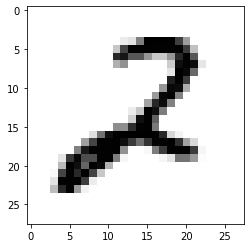

In [12]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

In [13]:
y[36001]

'2'

In [14]:
x_train = x[:60000]
x_test = x[60000:]

In [15]:
y_train = y[:60000]
y_test = y[60000:]

In [16]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]



In [17]:
shuffle_index

array([38698,  9346, 12048, ..., 39230, 45158, 47228])

## creating a 2 detector

In [18]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [19]:
y_train


array([5, 9, 7, ..., 5, 2, 2], dtype=int8)

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train , y_train==2)

C:\Users\Rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
clf.predict([some_digit]) 

array([ True])

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy" )

C:\Users\Rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [25]:
a.mean()

0.9791

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

C:\Users\Rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [27]:
y_train_pred

array([ True, False, False, ..., False,  True,  True])

## Calculating confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_train_2, y_train_pred)

array([[53588,   454],
       [  800,  5158]], dtype=int64)

In [32]:
confusion_matrix(y_train_2, y_train_2) #idel of perfect matrix

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision and Recall

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_train_2, y_train_pred) # This is my precision score

0.9191019244476123

In [35]:
recall_score(y_train_2, y_train_pred)   # This is my recall score

0.8657267539442766

## F1 Score

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_2, y_train_pred)

0.8916162489196197

## Precision Recall curve

In [38]:
from sklearn.metrics import precision_recall_curve

In [44]:
y_score = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

C:\Users\Rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [45]:
y_score

array([  1.56927405, -12.55079473, -14.18588215, ...,  -7.01253339,
         3.42040603,   8.41047736])

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_score)

In [47]:
precisions

array([0.0993    , 0.09930166, 0.09930331, ..., 1.        , 1.        ,
       1.        ])

In [48]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [49]:
thresholds


array([-45.85023582, -45.33256011, -43.72002383, ...,  17.7375729 ,
        18.58225384,  19.33506618])

## Precision Recall curve Plotting

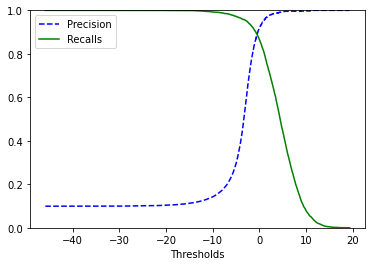

In [52]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()